# Collecting and analysing tweets related to stock market

### Requirement: 

1. Collecting data: In this assignment you need to collect data related to stock 
market from Twitter for one week. In Twitter, ticker symbols like #gold are used 
for stocks and companies. You are requested to collect the tweets with some 
specific keywords and store them in different files. The following keywords should 
be used: 
a. Altcoin 
b. Bitcoin 
c. Coindesk 
d. Cryptocurrency 
e. Gold 
f. APPL 
g. GOOG 
h. YHOO 

2. Saving data: You need to save the requested data into csv format of 8 files 
where data related to each keyword is saved. Each file consist of four columns: 
tweet id, time of tweet, user id and text. 
3. Cleaning data: remove duplication, remove punctuations, remove numbers in 
tweets, and remove words with length less than 2. 
4. Visualizing data: You need to present the daily number of tweets for each 
keyword as well as the daily number of users. 

In [1]:
import json
import tweepy
import re
import csv
import pandas as pd

## 1. Data collection

### Collect and save twitter data in CSV files by creating authentication and accessing Twitter

In [2]:
#Defining search_for_hashtags function to extract twitter data containing particular hashtag
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth)
    
    #defining file name for csv files
    path = ['C:\\Users\\srihi\\OneDrive\\Desktop\\PracticePy\\StockMarket\\StockMarket',hashtag_phrase]
    fname = '_'.join(path)
    
    #open the spreadsheet we will write to
    with open('%s.csv' %(fname), 'w') as file:

        w = csv.writer(file)
        w.writerow(['tweet_id', 'Timestamp', 'username', 'Tweet_Text','hashtag'])

        
        tweets = tweepy.Cursor(api.search, q=hashtag_phrase, \
                                lang="en", tweet_mode='extended').items(500)
        count = 0        
        for tweet in tweets:
            #count = count + 1
            w.writerow([tweet.id, tweet.created_at, tweet.user.screen_name.encode('utf-8'),
                             tweet.full_text.replace('\n',' ').encode('utf-8'), hashtag_phrase])
            #print(count,". ", tweet.full_text,'\n retweets:',tweet.retweet_count)

In [3]:
consumer_key = 'YQMy3z63C6N3bPvCo7MpXvOy4'
consumer_secret = 'PEI8unsvDdeTBDonWkT5SS0ESjzi2KpgyJFfhJRcS4pmrt1aHN'
access_token = '1357863603030876160-YyWiwboEpWS7OdJscPRtI7yhkzHqvo'
access_token_secret = 'p5a9hm4uvVSZ5xqiGSsD4NDNdwUseFjagWQYuhMcPupO0'

hashtag_list = ["#Altcoin","#Bitcoin","#Coindesk","#Cryptocurrency","#Gold","#APPL","#GOOG","#YHOO"]

#hashtag_phrase = input('Hashtag Phrase ')
for hashtag_phrase in hashtag_list:
    if __name__ == '__main__':
        search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase)

### Reading all the data collected into single data frame

In [4]:
#using Glob library to concatenate all the 8 CSV's files
import glob

# get data file names
path =r'C:\Users\srihi\OneDrive\Desktop\PracticePy\StockMarket'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)
df.head()

,tweet_id,Timestamp,username,Tweet_Text,hashtag
0,1369463627066048512,2021-03-10 01:42:26,b'bervend23',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin
1,1369463534866685961,2021-03-10 01:42:04,b'ChinaDieu',b'RT @CoinMarketCap: Are you a big #NFT lover?...,#Altcoin
2,1369463499903012865,2021-03-10 01:41:56,b'roy250swb',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin
3,1369463497944403970,2021-03-10 01:41:55,b'z4chet',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin
4,1369463424120352768,2021-03-10 01:41:38,b'miati81',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin


In [5]:
df.shape

(2516, 5)

In [6]:
df.tail()

,tweet_id,Timestamp,username,Tweet_Text,hashtag
2511,1366754977218260994,2021-03-02 14:19:14,b'OmegaSportsENT',b'Why does Twitter or Facebook or Google get t...,#GOOG
2512,1366752795991232516,2021-03-02 14:10:34,b'designyourinves',b'#AMZN #FB #GOOG Pinterest And Social Commerc...,#GOOG
2513,1366688173280157706,2021-03-02 09:53:47,b'leoventuresllc',b'Google...What Can I Say !! #google #googl #s...,#GOOG
2514,1366652491694227460,2021-03-02 07:31:59,b'sourkram',b'join me for free stocks on @WebullGlobal #we...,#GOOG
2515,1368980881788993537,2021-03-08 17:44:11,b'StrongBuyStock',b'$PACV Pacific Ventures Group Adds New Machin...,#YHOO


## 2. Data Cleaning

### 2.1 Removing Duplicates

In [7]:
df.duplicated(subset=['tweet_id'])

0       False
1       False
2       False
3       False
4       False
        ...  
2511    False
2512    False
2513    False
2514     True
2515    False
Length: 2516, dtype: bool

In [8]:
# Identifying number of Duplicates
df_dup = df[df['tweet_id'].duplicated() == True]

In [9]:
df_dup.shape

(121, 5)

In [10]:
#dropping duplicates
df = df.drop_duplicates(subset=['tweet_id'])

In [11]:
# No. of rows after removing duplicates is (Total number of rows - duplicate rows)
df.shape

(2395, 5)

### 2.2 Removing duplication, punctuations, numbers in tweets, and words with length less than 2.

In [12]:
import string
def clean_text(text):
    # remove numbers from tweet
    text_nonum = ''.join([i for i in text if not i.isdigit()])
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    #remove short words from the text
    text_no_shortwords = ' '.join(word for word in text_no_doublespace.split() if len(word)>3)
    return text_no_shortwords

df['cleaned_tweet'] = df['Tweet_Text'].apply(clean_text)

In [13]:
df.head()

,tweet_id,Timestamp,username,Tweet_Text,hashtag,cleaned_tweet
0,1369463627066048512,2021-03-10 01:42:26,b'bervend23',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...
1,1369463534866685961,2021-03-10 01:42:04,b'ChinaDieu',b'RT @CoinMarketCap: Are you a big #NFT lover?...,#Altcoin,coinmarketcap lover well keep date compare tok...
2,1369463499903012865,2021-03-10 01:41:56,b'roy250swb',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...
3,1369463497944403970,2021-03-10 01:41:55,b'z4chet',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...
4,1369463424120352768,2021-03-10 01:41:38,b'miati81',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...


In [14]:
df[['Tweet_Text', 'cleaned_tweet']]

,Tweet_Text,cleaned_tweet
0,b'RT @TheCryptoLark: Total #altcoin market cap...,thecryptolark total altcoin market just pullin...
1,b'RT @CoinMarketCap: Are you a big #NFT lover?...,coinmarketcap lover well keep date compare tok...
2,b'RT @TheCryptoLark: Total #altcoin market cap...,thecryptolark total altcoin market just pullin...
3,b'RT @TheCryptoLark: Total #altcoin market cap...,thecryptolark total altcoin market just pullin...
4,b'RT @TheCryptoLark: Total #altcoin market cap...,thecryptolark total altcoin market just pullin...
...,...,...
2508,b'RT @WebullGlobal: \xf0\x9f\xa4\xa9\xf0\x9f\x...,webullglobal xfxfxaxaxfxfxaxafree stocks waiti...
2511,b'Why does Twitter or Facebook or Google get t...,bwhy does twitter facebook google control narr...
2512,b'#AMZN #FB #GOOG Pinterest And Social Commerc...,bamzn goog pinterest social commerce match mad...
2513,b'Google...What Can I Say !! #google #googl #s...,bgooglewhat google googl stock tech internet g...


## 3. Data visualization

In [15]:
df['Dates'] = pd.to_datetime(df['Timestamp']).dt.date
df.head()

,tweet_id,Timestamp,username,Tweet_Text,hashtag,cleaned_tweet,Dates
0,1369463627066048512,2021-03-10 01:42:26,b'bervend23',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...,2021-03-10
1,1369463534866685961,2021-03-10 01:42:04,b'ChinaDieu',b'RT @CoinMarketCap: Are you a big #NFT lover?...,#Altcoin,coinmarketcap lover well keep date compare tok...,2021-03-10
2,1369463499903012865,2021-03-10 01:41:56,b'roy250swb',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...,2021-03-10
3,1369463497944403970,2021-03-10 01:41:55,b'z4chet',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...,2021-03-10
4,1369463424120352768,2021-03-10 01:41:38,b'miati81',b'RT @TheCryptoLark: Total #altcoin market cap...,#Altcoin,thecryptolark total altcoin market just pullin...,2021-03-10


In [16]:
#Counting daily number of users
date_users = df.groupby('Dates')['username'].nunique() 
date_users

Dates
2021-03-02      26
2021-03-03      35
2021-03-04      46
2021-03-05      28
2021-03-06      23
2021-03-07      43
2021-03-08      65
2021-03-09     395
2021-03-10    1197
Name: username, dtype: int64

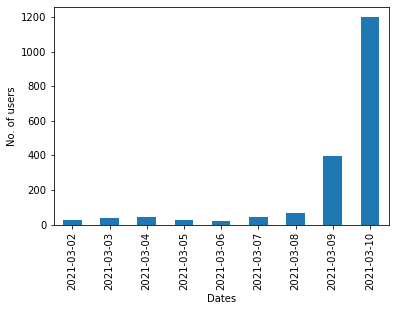

In [17]:
import matplotlib.pyplot as plt
date_users.plot(kind = 'bar')
plt.xlabel("Dates")
plt.ylabel("No. of users")
plt.show()

In [18]:
#Counting daily number of tweets for each hashtag
date_hashtag = df.groupby(['Dates', 'hashtag'])['tweet_id'].count().unstack().reset_index().fillna(0).set_index('Dates')
date_hashtag

hashtag,#APPL,#Altcoin,#Bitcoin,#Coindesk,#Cryptocurrency,#GOOG,#Gold,#YHOO
Dates,,,,,,,,
2021-03-02,8.0,0.0,0.0,23.0,0.0,8.0,0.0,0.0
2021-03-03,9.0,0.0,0.0,36.0,0.0,12.0,0.0,0.0
2021-03-04,21.0,0.0,0.0,31.0,0.0,16.0,0.0,0.0
2021-03-05,9.0,0.0,0.0,20.0,0.0,19.0,0.0,0.0
2021-03-06,2.0,0.0,0.0,21.0,0.0,16.0,0.0,0.0
2021-03-07,6.0,0.0,0.0,24.0,0.0,30.0,0.0,0.0
2021-03-08,20.0,0.0,0.0,45.0,0.0,23.0,0.0,1.0
2021-03-09,7.0,308.0,0.0,46.0,0.0,20.0,139.0,0.0
2021-03-10,0.0,192.0,497.0,1.0,428.0,3.0,354.0,0.0


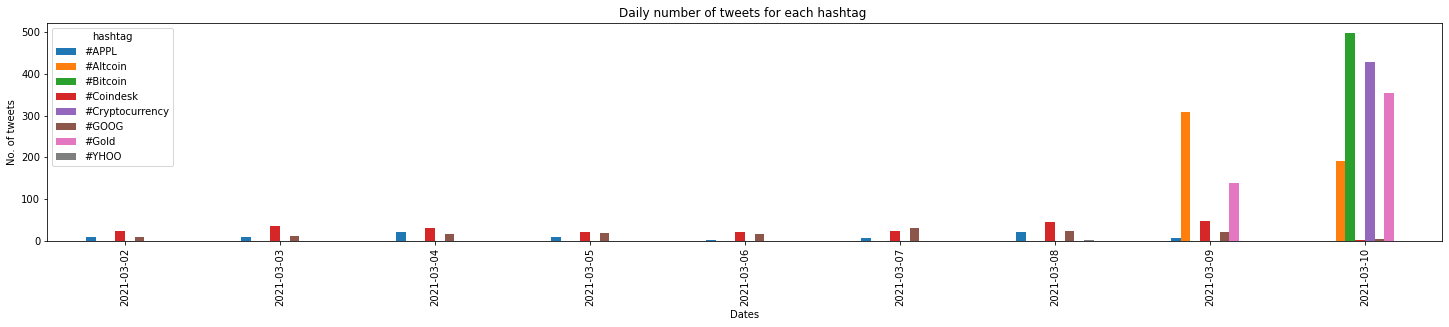

In [23]:
#Plotting count of daily number of tweets for each hashtag
plt.rcParams["figure.figsize"] = (25,4)
date_hashtag.plot(kind = 'bar')
plt.title('Daily number of tweets for each hashtag ')
plt.xlabel("Dates")
plt.ylabel("No. of tweets")
plt.show()

In [24]:
#Counting daily number of users for each hashtag
date_users = df.groupby(['Dates', 'hashtag'])['username'].count().unstack().reset_index().fillna(0).set_index('Dates')
date_users

hashtag,#APPL,#Altcoin,#Bitcoin,#Coindesk,#Cryptocurrency,#GOOG,#Gold,#YHOO
Dates,,,,,,,,
2021-03-02,8.0,0.0,0.0,23.0,0.0,8.0,0.0,0.0
2021-03-03,9.0,0.0,0.0,36.0,0.0,12.0,0.0,0.0
2021-03-04,21.0,0.0,0.0,31.0,0.0,16.0,0.0,0.0
2021-03-05,9.0,0.0,0.0,20.0,0.0,19.0,0.0,0.0
2021-03-06,2.0,0.0,0.0,21.0,0.0,16.0,0.0,0.0
2021-03-07,6.0,0.0,0.0,24.0,0.0,30.0,0.0,0.0
2021-03-08,20.0,0.0,0.0,45.0,0.0,23.0,0.0,1.0
2021-03-09,7.0,308.0,0.0,46.0,0.0,20.0,139.0,0.0
2021-03-10,0.0,192.0,497.0,1.0,428.0,3.0,354.0,0.0


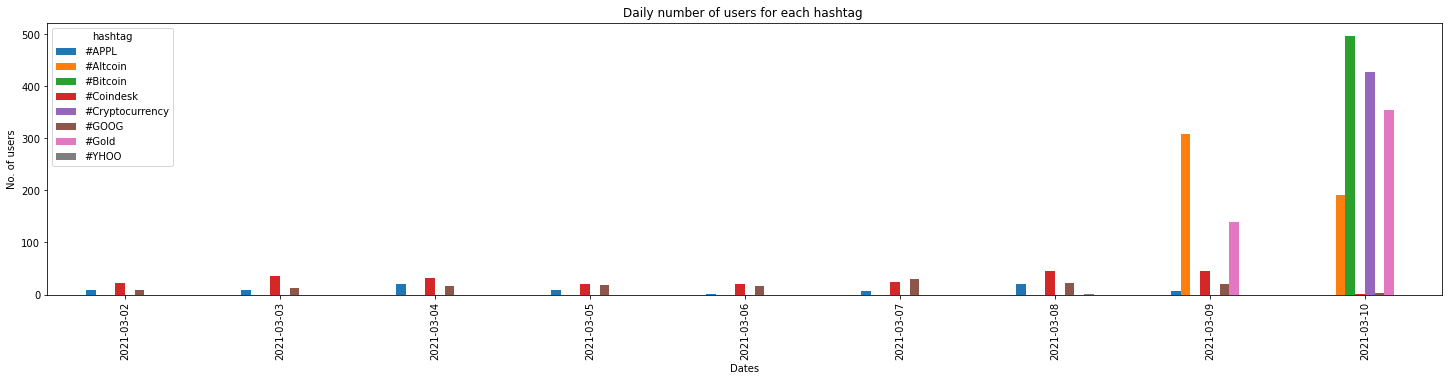

In [25]:
#Plotting count of daily number of users for each hashtag
plt.rcParams["figure.figsize"] = (25,5)
date_users.plot(kind = 'bar')
plt.title('Daily number of users for each hashtag ')
plt.xlabel("Dates")
plt.ylabel("No. of users")
plt.show()